# COGS 108 FA23 A04/A07
## Week 4 Demo: Data Visualizations and EDA
#### This demo is adapted from D3.

### First of all, import libraries needed:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Let's then load and clean our data:

The cell below is for better visualizations:

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set(context = 'talk', style='white')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.options.display.precision = 2

# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
# read in and clean up the data
survey = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv')
survey  = survey.iloc[1:,2:]
survey.columns = ['smoking','alcohol','gambling',
 'skydiving','speeding', 'cheated',
 'steak', 'steak_preference','gender',
 'age', 'income', 'education', 'region']
survey = survey.dropna(how='all')
survey.head()

,smoking,alcohol,gambling,skydiving,...,age,income,education,region
2,No,Yes,No,No,...,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,No,Yes,Yes,No,...,> 60,"$150,000+",Graduate degree,South Atlantic
4,Yes,Yes,Yes,No,...,> 60,"$50,000 - $99,999",Bachelor degree,New England
5,No,Yes,No,No,...,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic
6,No,No,No,No,...,18-29,"$0 - $24,999",Some college or Associate degree,West South Central


### Several Exploratory Data Analysis and Data Visualizations:

How to count the number of each unique answers in a column:

In [4]:
survey['alcohol'].value_counts()

Yes    416
No     125
Name: alcohol, dtype: int64

How to make a barplot using Seaborn:

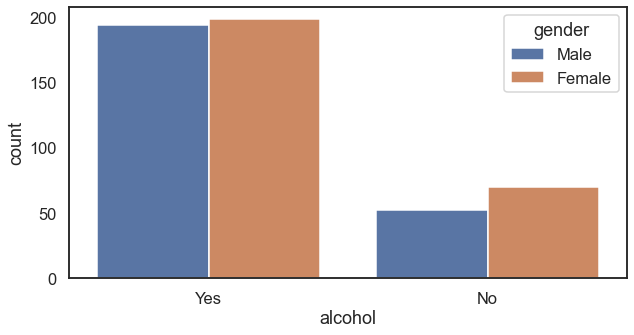

In [5]:
plot_alcohol = sns.countplot(x = 'alcohol', # The x-axis represents the 'alcohol' values
              hue = 'gender',  # Differentiate bars by 'gender'
              data = survey);

# Define the data source and the variables to be plotted
# 'alcohol' is the variable on the x-axis, and 'gender' is used for color differentiation.
# 'data=survey' specifies that the data for the plot comes from the 'survey' dataset.

plt.show()
# This line shows the plot (optional)

How to make the barplot show proportions instead of value counts:

In [6]:
prop_df = (survey.groupby(['gender'])['alcohol']
           .value_counts(normalize = True)) # Calculate proportions by setting normalize=True
           #.rename('proportion') # Rename the resulting column to 'proportion'
           #.reset_index()) # Reset the index to create a new DataFrame

# The resulting 'prop_df' DataFrame will have columns:
# - 'gender': The gender category
# - 'alcohol': The 'alcohol' value within that category
# - 'proportion': The proportion of occurrences of each 'alcohol' value 
#    within the corresponding 'gender' category.

prop_df

gender  alcohol
Female  Yes        0.74
        No         0.26
Male    Yes        0.79
        No         0.21
Name: alcohol, dtype: float64

In [7]:
# Plot the data:

plot_proportion = sns.barplot(x = 'alcohol', # The x-axis represents the 'alcohol' values
            y = 'proportion', # The y-axis represents the 'proportion' values
            hue = 'gender', 
            data = prop_df);

plt.show()

ValueError: Could not interpret input 'alcohol'

How to change the hue order in a boxplot:

In [8]:
plot_reorder = sns.barplot(x = 'alcohol', 
            y = 'proportion', 
            hue = 'gender', 
            hue_order = ["Male","Female"], # Make the hue order as ['Male', 'Female']
            data = prop_df);

ValueError: Could not interpret input 'alcohol'

How to make a boxplot in different color and orientation :

In [9]:
plot_reorder = sns.barplot(x = 'proportion', # We can change the orientation by simply swap the x and y axis
            y = 'alcohol', 
            hue = 'gender', 
            hue_order = ["Male","Female"], # Make the hue order as ['Male', 'Female']
            palette = "magma", # Change the palette to "magma"
                               # For more palettes, go to https://seaborn.pydata.org/tutorial/color_palettes.html
            data = prop_df);

ValueError: Could not interpret input 'proportion'